In [17]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [3]:
# 1. 데이터 생성
# train set과 test set 분류
(X_train, y_train), (X_test,y_test) = mnist.load_data()

# data preprocessing
X_train = X_train.reshape((60000,28*28)).astype('float32')/255.0
X_test = X_test.reshape((10000,28*28)).astype('float32')/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# validation을 위한 data set(train set의 30%)
X_val = X_train[:42000]
X_train = X_train[42000:]
y_val = y_train[:42000]
y_train = y_train[42000:]

In [4]:
# 2.modeling
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# modeling seting
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [5]:
# model learning
mnist = model.fit(X_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
18000/18000 [==============================] - 5s 276us/step - loss: 0.3846 - acc: 0.8811
Epoch 2/10
18000/18000 [==============================] - 5s 265us/step - loss: 0.1211 - acc: 0.9629
Epoch 3/10
18000/18000 [==============================] - 5s 265us/step - loss: 0.0705 - acc: 0.9769
Epoch 4/10
18000/18000 [==============================] - 5s 257us/step - loss: 0.0461 - acc: 0.9847
Epoch 5/10
18000/18000 [==============================] - 5s 257us/step - loss: 0.0281 - acc: 0.9904
Epoch 6/10
18000/18000 [==============================] - 5s 255us/step - loss: 0.0209 - acc: 0.9932
Epoch 7/10
18000/18000 [==============================] - 5s 254us/step - loss: 0.0207 - acc: 0.9928
Epoch 8/10
18000/18000 [==============================] - 5s 255us/step - loss: 0.0242 - acc: 0.9922
Epoch 9/10
18000/18000 [==============================] - 5s 254us/step - loss: 0.0153 - acc: 0.9952
Epoch 10/10
18000/18000 [==============================] - 5s 258us/step - loss: 0.0141 - 

In [6]:
# train set 학습 모델 평가
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 120us/step
0.16549365178053613 0.9657999873161316


In [7]:
# validation set learning 
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
val = model.fit(partial_X_train,partial_y_train,epochs=10, batch_size=128,validation_data = (X_val,y_val))

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 301us/step - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0123 - val_acc: 0.9966
Epoch 2/10
8000/8000 [==============================] - 2s 299us/step - loss: 0.0062 - acc: 0.9981 - val_loss: 0.0226 - val_acc: 0.9928
Epoch 3/10
8000/8000 [==============================] - 2s 302us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0062 - val_acc: 0.9982
Epoch 4/10
8000/8000 [==============================] - 2s 301us/step - loss: 0.0044 - acc: 0.9994 - val_loss: 0.0078 - val_acc: 0.9969
Epoch 5/10
8000/8000 [==============================] - 2s 311us/step - loss: 6.3592e-04 - acc: 0.9998 - val_loss: 0.0070 - val_acc: 0.9980
Epoch 6/10
8000/8000 [==============================] - 2s 297us/step - loss: 7.4470e-04 - acc: 0.9998 - val_loss: 0.0056 - val_acc: 0.9981
Epoch 7/10
8000/8000 [==============================] - 2s 304us/step - loss: 8.4994e-05 - acc: 1.0000 - val_loss: 0.0053 - val

In [8]:
#validation 학습모델 평가
val_loss,val_acc =model.evaluate(X_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 122us/step
0.14502747243504258 0.9732999801635742


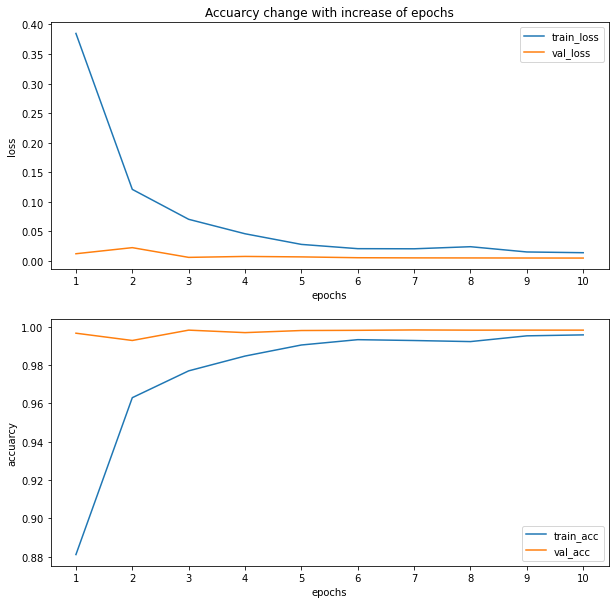

In [15]:
# train set과 validation set의 epoch의 따른 loss와 accuracy 변화
x = np.arange(1,11)
mnist_dict = mnist.history
loss = mnist_dict['loss']
acc = mnist_dict['acc']

val_dict = val.history
val_loss = val_dict['val_loss']
val_acc = val_dict['val_acc']

# plot
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Loss change with increase of epochs')
plt.subplot(211)
plt.plot(x,loss,label = 'train_loss')
plt.plot(x,val_loss,label='val_loss')
plt.xticks(np.arange(1,11,1))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.title('Accuarcy change with increase of epochs')
plt.subplot(212)
plt.plot(x,acc,label = 'train_acc')
plt.plot(x,val_acc,label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.xticks(np.arange(1,11,1))

plt.legend()
plt.show()

In [10]:
# modeling 한 결과로 mnist 데이터 분류
y_pred = model.predict(X_test)

In [11]:
# 첫번째 예측값
print(y_pred[0])
print(len(y_pred[0]))

# 이 10개의 값들은 0~9에 대응하는 예측 모델의 신뢰도를 뜻한다.

[3.9297208e-15 2.8520597e-13 6.0870807e-13 3.9348008e-14 3.8346024e-13
 9.1184947e-14 1.0746036e-17 1.0000000e+00 2.1103630e-16 2.6776273e-13]
10


In [12]:
# 첫번째 예측값의 가장 높은 신뢰도를 가지는 레이블
print(np.argmax(y_pred[0]))

7


In [13]:
# y_test데이터와 위의 예측 모델로 부터 얻은 결과값을 확인
print(np.argmax(y_test[0]))
# 이 결과값을 보면 예측 모델로 부터 얻은 결과값과 test set의 결과 값이 같음을 알 수 있다.

7


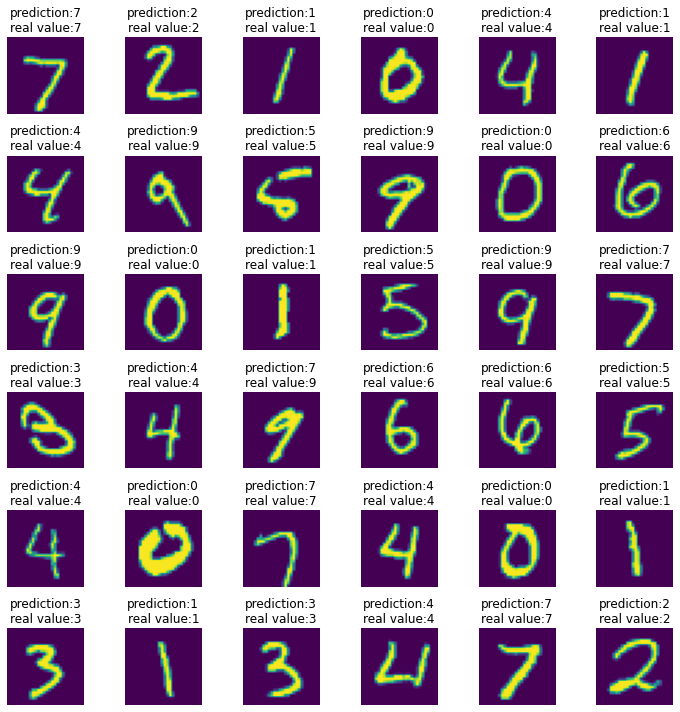

In [16]:
#  해당 결과를 image화를 해서 예측 결과와 image set과 비교해본다.
plt_row = 6
plt_col = 6
plt.rcParams['figure.figsize'] = (10,10)

axes = []
fig = plt.figure()

for i in range(plt_row*plt_col):
    X_test_plot = X_test[i].reshape(28,28)
    axes.append(fig.add_subplot(plt_row,plt_col,i+1))
    predict = np.argmax(y_pred[i])
    real = np.argmax(y_test[i])
    subplot_title = ("prediction:"+str(predict)+"\n"+"real value:"+ str(real))
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    plt.imshow(X_test_plot)
    
fig.tight_layout()
plt.show()   

MLP를 이용해서 얻은 accuarcy는 train set에서 96%, validation set에서 98%로 높은 정확도를 가지고 있다. loss 또한 epochs를 높일 수록 0에 가까운 값이 산출되었다.
실제 위에서 학습한 model을 이용해서 얻은 예측값과 test set을 비교 해봤을 경우에도 매우 정확하게 맞춘 것 또한 확인 할 수 있었다.